In [2]:
config = { 
    'ENDPOINT': 'https://aa-backend.documents.azure.com:443',
    'MASTERKEY': 'vEMMI7bGkQmjDtenMzj4ccHodUmROzCfmHXXh9wneGFUfU8XSnaxsopZBuLQhQ0cuWe7YXirqpA5kbIWoCFiAQ==',
    'DOCUMENTDB_DATABASE': 'aa-backend-db',
    'DOCUMENTDB_COLLECTION': 'sessions-backend'
};


In [169]:
import pydocumentdb;
import pydocumentdb.document_client as document_client
import pydocumentdb.documents as documents

In [12]:
options = {
    #'offerEnableRUPerMinuteThroughput': True,
    #'offerVersion': "V2",
    'offerThroughput': 1000
}


In [4]:
client = document_client.DocumentClient(config['ENDPOINT'], {'masterKey': config['MASTERKEY']})

In [8]:
db = client.GetDatabaseAccount()

In [12]:
db.ReadableLocations

[{'databaseAccountEndpoint': 'https://aa-backend-westeurope.documents.azure.com:443/',
  'name': 'West Europe'}]

In [13]:
db.WritableLocations

[{'databaseAccountEndpoint': 'https://aa-backend-westeurope.documents.azure.com:443/',
  'name': 'West Europe'}]

In [33]:
 databases = list(client.QueryDatabases({
            'query': 'SELECT * FROM root r'
        }))

In [31]:
databases

[{'_colls': 'colls/',
  '_etag': '"00003a01-0000-0000-0000-59e3ccf20000"',
  '_rid': 'D216AA==',
  '_self': 'dbs/D216AA==/',
  '_ts': 1508101362,
  '_users': 'users/',
  'id': 'aa-backend-db'}]

In [41]:
dbs = [i for i in client.ReadDatabases()]

In [43]:
[i for i in client.ReadCollections(dbs[0]['_self'])]

[{'_conflicts': 'conflicts/',
  '_docs': 'docs/',
  '_etag': '"00000c00-0000-0000-0000-59ff63500000"',
  '_rid': 'D216AIDUNQA=',
  '_self': 'dbs/D216AA==/colls/D216AIDUNQA=/',
  '_sprocs': 'sprocs/',
  '_triggers': 'triggers/',
  '_ts': 1509909328,
  '_udfs': 'udfs/',
  'id': 'session-history',
  'indexingPolicy': {'automatic': True,
   'excludedPaths': [],
   'includedPaths': [{'indexes': [{'dataType': 'Number',
       'kind': 'Range',
       'precision': -1},
      {'dataType': 'String', 'kind': 'Hash', 'precision': 3}],
     'path': '/*'}],
   'indexingMode': 'consistent'},
  'partitionKey': {'kind': 'Hash', 'paths': ['/session_id']}},
 {'_conflicts': 'conflicts/',
  '_docs': 'docs/',
  '_etag': '"00001400-0000-0000-0000-5a0029270000"',
  '_rid': 'D216ALSQ5AA=',
  '_self': 'dbs/D216AA==/colls/D216ALSQ5AA=/',
  '_sprocs': 'sprocs/',
  '_triggers': 'triggers/',
  '_ts': 1509959975,
  '_udfs': 'udfs/',
  'defaultTtl': 3600,
  'id': 'sessions',
  'indexingPolicy': {'automatic': True,
  

## Read image

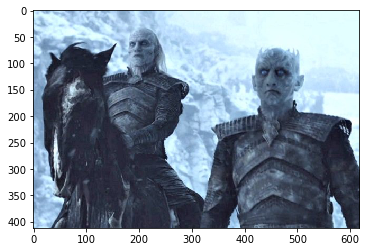

In [49]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

%matplotlib inline

im = Image.open("../img/game-of-thrones-night-king-ice-dragon.jpg")
imshow(np.asarray(im))

In [54]:
import requests, io

faceapi_url = "https://westeurope.api.cognitive.microsoft.com/face/v1.0/detect"
faceapi_key = "b40cd56a48c244f4b838488c0dda6eff"


params = {
    "returnFaceId": "true",
    "returnFaceLandmarks": "false",
    "returnFaceAttributes": "age,gender,smile,emotion",
}

headers = {"Content-Type": "application/octet-stream",
            "Ocp-Apim-Subscription-Key": faceapi_key}

#pic = io.BytesIO()
im.save(pic, "JPEG")
print(pic)
r = requests.post(faceapi_url, params = params, headers = headers, data = pic.getvalue())

print(r.json())

[{'faceId': '60eaba5e-e257-4788-a76e-fb17f819bae7', 'faceRectangle': {'top': 98, 'left': 413, 'width': 78, 'height': 78}, 'faceAttributes': {'smile': 0.001, 'gender': 'male', 'age': 44.1, 'emotion': {'anger': 0.176, 'contempt': 0.026, 'disgust': 0.022, 'fear': 0.007, 'happiness': 0.001, 'neutral': 0.657, 'sadness': 0.1, 'surprise': 0.01}}}, {'faceId': '235baaf3-a449-477c-9013-ed03ad0e6a70', 'faceRectangle': {'top': 49, 'left': 174, 'width': 49, 'height': 49}, 'faceAttributes': {'smile': 0.01, 'gender': 'male', 'age': 76.8, 'emotion': {'anger': 0.061, 'contempt': 0.009, 'disgust': 0.004, 'fear': 0.001, 'happiness': 0.01, 'neutral': 0.887, 'sadness': 0.024, 'surprise': 0.004}}}]


## Create a new database and a collection

In [56]:
client.CreateDatabase(database={"id":"test"})

{'_colls': 'colls/',
 '_etag': '"00005d00-0000-0000-0000-5a101a5e0000"',
 '_rid': 'lRZZAA==',
 '_self': 'dbs/lRZZAA==/',
 '_ts': 1511004766,
 '_users': 'users/',
 'id': 'test'}

In [64]:
db  = client.ReadDatabase("dbs/test")
db

{'_colls': 'colls/',
 '_etag': '"00005d00-0000-0000-0000-5a101a5e0000"',
 '_rid': 'lRZZAA==',
 '_self': 'dbs/lRZZAA==/',
 '_ts': 1511004766,
 '_users': 'users/',
 'id': 'test'}

In [68]:
coll =  client.CreateCollection(database_link=db['_self'], collection={"id":"test_coll" }, options ={"offerThroughput":400})

In [70]:
coll = client.ReadCollection("dbs/test/colls/test_coll")
coll

{'_conflicts': 'conflicts/',
 '_docs': 'docs/',
 '_etag': '"00006400-0000-0000-0000-5a1021cd0000"',
 '_rid': 'lRZZAIrkcgE=',
 '_self': 'dbs/lRZZAA==/colls/lRZZAIrkcgE=/',
 '_sprocs': 'sprocs/',
 '_triggers': 'triggers/',
 '_ts': 1511006669,
 '_udfs': 'udfs/',
 'id': 'test_coll',
 'indexingPolicy': {'automatic': True,
  'excludedPaths': [],
  'includedPaths': [{'indexes': [{'dataType': 'Number',
      'kind': 'Range',
      'precision': -1},
     {'dataType': 'String', 'kind': 'Hash', 'precision': 3}],
    'path': '/*'}],
  'indexingMode': 'consistent'}}

In [78]:
#(i['content']['offerThroughput'], i['resource'])
[(i['content']['offerThroughput'], i['resource']) for i in client.QueryOffers("SELECT * FROM root r")]

[(400, 'dbs/lRZZAA==/colls/lRZZAIrkcgE=/'),
 (1000, 'dbs/D216AA==/colls/D216ALSQ5AA=/'),
 (1000, 'dbs/D216AA==/colls/D216AIDUNQA=/')]

In [82]:
[(i['content']['offerThroughput'], i['resource']) for i in client.ReadOffers()]

[(400, 'dbs/lRZZAA==/colls/lRZZAIrkcgE=/'),
 (1000, 'dbs/D216AA==/colls/D216ALSQ5AA=/'),
 (1000, 'dbs/D216AA==/colls/D216AIDUNQA=/')]

In [87]:
for i in r.json():
    client.CreateDocument(database_or_collection_link=coll['_self'], document=i)

In [109]:
qry = '''\
SELECT r.emotion.happiness 
  FROM root.faceAttributes r 
 WHERE r.emotion.happiness > 0.005
'''

list(client.QueryDocuments(coll['_self'], qry))

[{'happiness': 0.01}]

In [114]:
?%timeit

In [115]:
%%timeit -n 1000
for i in r.json():
    client.CreateDocument(database_or_collection_link=coll['_self'], document=i)

1000 loops, best of 3: 111 ms per loop


In [124]:
[i for i in client.ReadOffers() if i['resource'] == coll['_self']][0]

{'_etag': '"00006500-0000-0000-0000-5a1021cd0000"',
 '_rid': 'UCEr',
 '_self': 'offers/UCEr/',
 '_ts': 1511006669,
 'content': {'offerIsRUPerMinuteThroughputEnabled': False,
  'offerThroughput': 400},
 'id': 'UCEr',
 'offerResourceId': 'lRZZAIrkcgE=',
 'offerType': 'Invalid',
 'offerVersion': 'V2',
 'resource': 'dbs/lRZZAA==/colls/lRZZAIrkcgE=/'}

In [129]:
offer  = [i for i in client.ReadOffers() if i['resource'] == coll['_self']][0]
offer['content']['offerThroughput'] = 1000
client.ReplaceOffer(offer["_self"],offer)

{'_etag': '"00006800-0000-0000-0000-5a1031b10000"',
 '_rid': 'UCEr',
 '_self': 'offers/UCEr/',
 '_ts': 1511010737,
 'content': {'offerIsRUPerMinuteThroughputEnabled': False,
  'offerThroughput': 1000},
 'id': 'UCEr',
 'offerResourceId': 'lRZZAIrkcgE=',
 'offerType': 'Invalid',
 'offerVersion': 'V2',
 'resource': 'dbs/lRZZAA==/colls/lRZZAIrkcgE=/'}

In [132]:
%%timeit -n 1000
for i in r.json():
    client.CreateDocument(database_or_collection_link=coll['_self'], document=i)

1000 loops, best of 3: 153 ms per loop


In [134]:
offer['content']['offerThroughput'] = 400
client.ReplaceOffer(offer["_self"],offer)

{'_etag': '"00006900-0000-0000-0000-5a103dd30000"',
 '_rid': 'UCEr',
 '_self': 'offers/UCEr/',
 '_ts': 1511013843,
 'content': {'offerIsRUPerMinuteThroughputEnabled': False,
  'offerThroughput': 400},
 'id': 'UCEr',
 'offerResourceId': 'lRZZAIrkcgE=',
 'offerType': 'Invalid',
 'offerVersion': 'V2',
 'resource': 'dbs/lRZZAA==/colls/lRZZAIrkcgE=/'}

In [139]:
doc = next((i for i in client.ReadDocuments(coll['_self'])))
doc

{'_attachments': 'attachments/',
 '_etag': '"040061af-0000-0000-0000-5a1028a30000"',
 '_rid': 'lRZZAIrkcgEBAAAAAAAAAA==',
 '_self': 'dbs/lRZZAA==/colls/lRZZAIrkcgE=/docs/lRZZAIrkcgEBAAAAAAAAAA==/',
 '_ts': 1511008419,
 'faceAttributes': {'age': 44.1,
  'emotion': {'anger': 0.176,
   'contempt': 0.026,
   'disgust': 0.022,
   'fear': 0.007,
   'happiness': 0.001,
   'neutral': 0.657,
   'sadness': 0.1,
   'surprise': 0.01},
  'gender': 'male',
  'smile': 0.001},
 'faceId': '60eaba5e-e257-4788-a76e-fb17f819bae7',
 'faceRectangle': {'height': 78, 'left': 413, 'top': 98, 'width': 78},
 'id': '288dd98f-b8bd-452d-bd93-b98f878525ed'}

In [141]:
client.CreateAttachmentAndUploadMedia(doc['_self'], readable_stream = pic)

{'_etag': '"0500b68a-0000-0000-0000-5a103ec20000"',
 '_rid': 'lRZZAIrkcgEBAAAAAAAAAErkmGc=',
 '_self': 'dbs/lRZZAA==/colls/lRZZAIrkcgE=/docs/lRZZAIrkcgEBAAAAAAAAAA==/attachments/lRZZAIrkcgEBAAAAAAAAAErkmGc=',
 '_ts': 1511014082,
 'contentType': 'application/octet-stream',
 'id': '5f6738d8-ac17-478f-9cbe-89752794ce3d',
 'media': '/media/lRZZAIrkcgEBAAAAAAAAAErkmGcB'}

In [157]:
attach = list(client.ReadAttachments(document_link=doc['_self']))[0]

In [155]:
client.DeleteAttachment(attachment_link=attach["_self"])

In [156]:
client.CreateAttachmentAndUploadMedia(doc['_self'], readable_stream = pic)

{'_etag': '"0500cc92-0000-0000-0000-5a1046a80000"',
 '_rid': 'lRZZAIrkcgEBAAAAAAAAALzCq9g=',
 '_self': 'dbs/lRZZAA==/colls/lRZZAIrkcgE=/docs/lRZZAIrkcgEBAAAAAAAAAA==/attachments/lRZZAIrkcgEBAAAAAAAAALzCq9g=',
 '_ts': 1511016104,
 'contentType': 'application/octet-stream',
 'id': '477ef9bd-5f96-4a91-be61-e48e0e599bc6',
 'media': '/media/lRZZAIrkcgEBAAAAAAAAALzCq9gB'}

In [168]:
attach['media']

'/media/lRZZAIrkcgEBAAAAAAAAALzCq9gB'

In [173]:
%pdb on
client.connection_policy.MediaReadMode = (
    documents.MediaReadMode.Streamed)

b  = client.ReadMedia(attach['media'])

Automatic pdb calling has been turned ON


TypeError: a bytes-like object is required, not 'str'

> c:\proglang\anaconda3\lib\base64.py(61)b64encode()
     59     if altchars is not None:
     60         assert len(altchars) == 2, repr(altchars)
---> 61         return encoded.translate(bytes.maketrans(b'+/', altchars))
     62     return encoded
     63 

ipdb> altchars
'+-'
ipdb> altchars = b'+-'
ipdb> encoded.translate(bytes.maketrans(b'+/', altchars))
b'lrzzairkcgebaaaaaaaaalzcq9g='
ipdb> q


In [ ]:
client.UpdateMedia()

In [153]:
attach = client.CreateAttachment(doc['_self'], {"slug": "nightking.jpg", "id": "image_id",  
    "contentType": "image/jpg",  
    "media": "www.bing.com"  })
attach

{'_etag': '"0500f091-0000-0000-0000-5a1045d50000"',
 '_rid': 'lRZZAIrkcgEBAAAAAAAAANpghzw=',
 '_self': 'dbs/lRZZAA==/colls/lRZZAIrkcgE=/docs/lRZZAIrkcgEBAAAAAAAAAA==/attachments/lRZZAIrkcgEBAAAAAAAAANpghzw=',
 '_ts': 1511015893,
 'contentType': 'image/jpg',
 'id': 'image_id',
 'media': 'www.bing.com',
 'slug': 'nightking.jpg'}

In [67]:
client.DeleteCollection(coll['_self'])